In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

from algotithms import GibbsSampler
from algotithms import MetropolisHastings

# Распределение
В качестве функции распределения возьмём плотность экспоненциального распределения

In [2]:
SEED = 42
N_SAMPLES = 10000
SCALE=17

Возьмём случайную выборку из экспоненциального распределения

In [3]:
rng = np.random.default_rng(seed=SEED)
samples = rng.exponential(size=N_SAMPLES, scale=SCALE)

## KDE 
Построим ядерную оценку плотности для выборки

In [5]:
kde = gaussian_kde(samples, bw_method=0.7)

In [6]:
x = np.linspace(samples.min(), samples.max(), 10000)
kde_proba = kde(x)
kde_proba

array([1.84148477e-02, 1.84297559e-02, 1.84446498e-02, ...,
       7.02240409e-06, 7.01650095e-06, 7.01059694e-06])

## EM-алгоритм
Построим оценку плотности на основе смеси гауссовских распределений

In [7]:
em = GaussianMixture(n_components=2)
samples_reshaped = samples.reshape(-1, 1)
em.fit(samples_reshaped)
log_density = em.score_samples(x.reshape(-1, 1))
em_proba = np.exp(log_density)

## Сравнение 

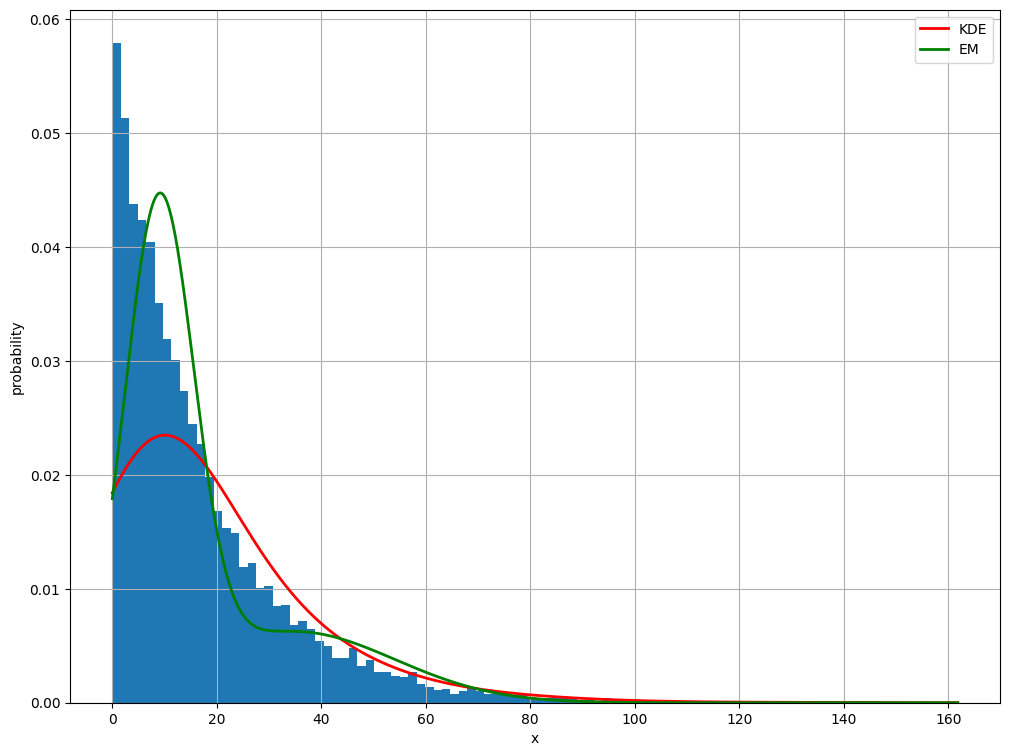

In [8]:
plt.figure(figsize=(12, 9))
plt.hist(samples, bins=100, density=True)
plt.plot(x, kde_proba, color='r', label='KDE', linewidth=2)
plt.plot(x, em_proba, color='g', label='EM', linewidth=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('probability')
plt.legend()
plt.show()

## Метод Метрополиса-Гастингса
В качестве предлагающего распределения возьмём стандартное нормальное

In [9]:
def gaussian_proposal(current_state,
                      mean=0,
                      std=1):
    return current_state + np.random.normal(mean, std, size=np.asarray(current_state).shape)

In [10]:
target_distribution = kde.evaluate

In [11]:
mh_sampler = MetropolisHastings(target_distribution=target_distribution,
                                proposal_distribution=gaussian_proposal,
                                initial_state=rng.choice(samples))
sampled_mh_kde = mh_sampler.run(10000)
def target_distribution(x):
    return np.exp(em.score_samples(x.reshape(-1, 1)))
mh_sampler = MetropolisHastings(target_distribution=target_distribution,
                                proposal_distribution=gaussian_proposal,
                                initial_state=rng.choice(samples))
sampled_mh_em = mh_sampler.run(10000)

## Сэмплирование с помощью метода Метрополиса-Гастингса на основе KDE и EM-алгоритма

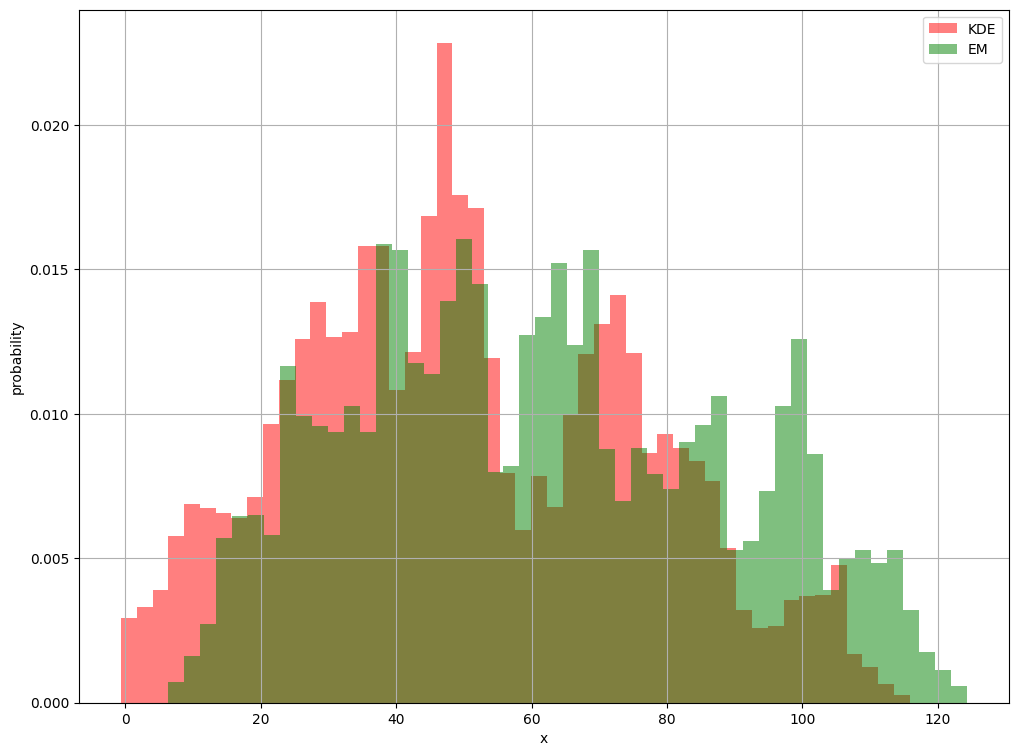

In [12]:
plt.figure(figsize=(12, 9))
plt.hist(sampled_mh_em, bins=50, density=True, color='r', alpha=0.5, label='KDE')
plt.hist(sampled_mh_kde, bins=50, density=True, color='g', alpha=0.5, label='EM')
plt.grid()
plt.xlabel('x')
plt.ylabel('probability')
plt.legend()
plt.show()

## Сэмплирование методом Гиббса

In [13]:
gibbs_sampler = GibbsSampler(initial_state=0,
                             data=samples,
                             seed=42)
sampled_gibbs = gibbs_sampler.run(num_steps=10000)

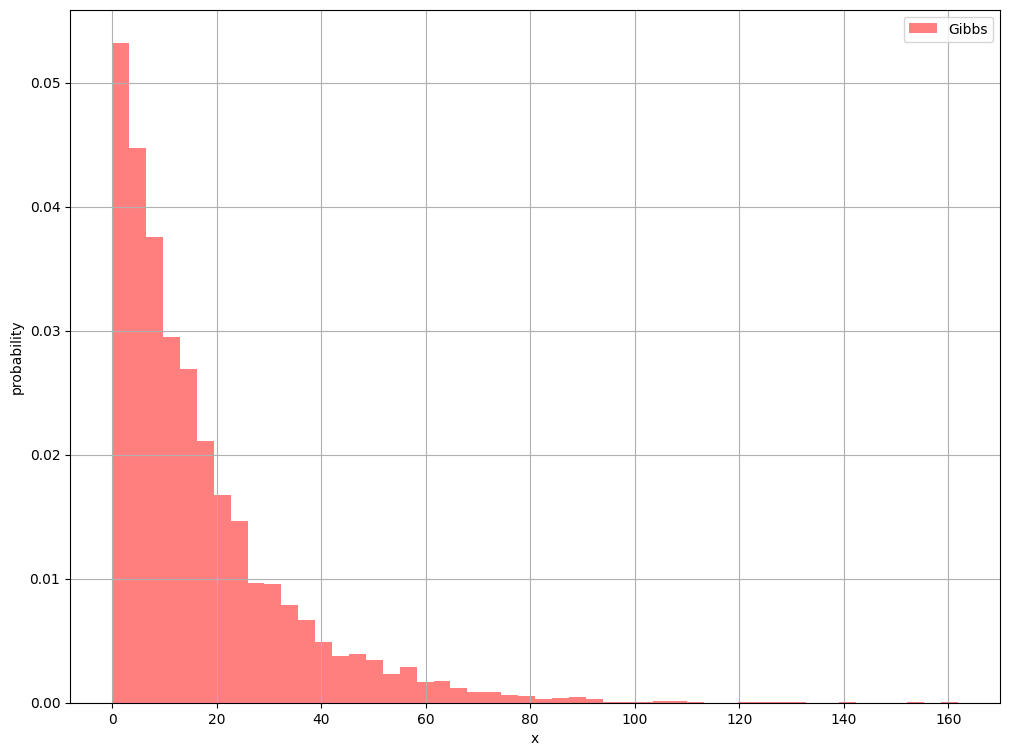

In [14]:
plt.figure(figsize=(12, 9))
plt.hist(sampled_gibbs, bins=50, density=True, color='r', alpha=0.5, label='Gibbs')
plt.grid()
plt.xlabel('x')
plt.ylabel('probability')
plt.legend()
plt.show()